In [47]:
import pandas as pd
import plotly.express as px

Тут я экспортировал три таблицы:
- Платные парковки на улично-дорожной сети
- Перехватывающие парковки
- Платные парковки закрытого типа

В целом и ежу понятно, что не все они нам нужны, но давайте ради прикола посмотрим ВСЕ платные парковки Москвы
а ещё с датасетом повезло, он сразу чистый!!!! респект правительству Москвы за такое

а, ну и не всё нам потребуется в данном проекте, поэтому немного поудалять придёдтся.




In [214]:
df1 = pd.read_excel('data/first.xlsx')
df2 = pd.read_excel('data/second.xlsx')
df3 = pd.read_excel('data/third.xlsx')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [215]:
df1.drop(0, inplace=True)
df1.drop(["ID", "PlaceID", "District", "AdmArea", "Address", "Hours", "Tariffs", "global_id", "geodata_center" ], axis=1, inplace=True)
# Проверка результата
df1.head(5)

,Name,CountSpaces,geoData
1,Парковка № 9401,51,"{coordinates=[[[37.56734, 55.82535], [37.56723..."
2,Парковка № 9402,25,"{coordinates=[[[37.534988, 55.777171], [37.534..."
3,Парковка № 9084,30,"{coordinates=[[[37.404991, 55.753833], [37.405..."
4,Парковка № 9081,63,"{coordinates=[[[37.502385, 55.697989], [37.502..."
5,Парковка № 9704,65,"{coordinates=[[[37.7975, 55.637889], [37.79749..."


In [218]:
df2.drop(0, inplace=True)
df2.drop(["ID", "District", "AdmArea", "Address", "Tariffs", "global_id", "geodata_center", "ParkingZoneNumber", "CarCapacityDisabled"], axis=1, inplace=True)
df2.columns = ['Name','CountSpaces', 'geoData']
df2.head(4)

,Name,CountSpaces,geoData
1,Парковка №3005 (225),14,"{coordinates=[[[37.641710469, 55.788063023], [..."
2,Парковка №3005 (221),4,"{coordinates=[[[37.6430601, 55.7841542], [37.6..."
3,Парковка №3005 (224),22,"{coordinates=[[[37.64203, 55.787132], [37.6422..."
4,Парковка №3005 (223),8,"{coordinates=[[[37.642288, 55.786428], [37.642..."


In [220]:
df3.drop(0, inplace=True)
df3.drop(["District", "AdmArea", "global_id", "geodata_center", "MetroStation", "MetroLine", "DiameterStation", "DiameterName", "LocationDescription", "Schedule", "OrgPhone"], axis=1, inplace=True)
df3.columns = ['Name', 'CountSpaces', 'geoData']
df3.head(4)

,Name,CountSpaces,geoData
1,Перехватывающая парковка метрополитена «Красно...,528,"{coordinates=[37.7392635, 55.613419], type=Point}"
2,Перехватывающая парковка №9089 метрополитена 5...,261,"{coordinates=[37.6687295, 55.619927], type=Point}"
3,Перехватывающая парковка №9102 метрополитена 9...,459,"{coordinates=[37.471449, 55.5604535], type=Point}"
4,Перехватывающая парковка метрополитена «Прокшино»,1291,"{coordinates=[37.434994, 55.5838455], type=Point}"


In [222]:
combined_df = pd.concat([df1, df2, df3], ignore_index=True)
combined_df

,Name,CountSpaces,geoData
0,Парковка № 9401,51,"{coordinates=[[[37.56734, 55.82535], [37.56723..."
1,Парковка № 9402,25,"{coordinates=[[[37.534988, 55.777171], [37.534..."
2,Парковка № 9084,30,"{coordinates=[[[37.404991, 55.753833], [37.405..."
3,Парковка № 9081,63,"{coordinates=[[[37.502385, 55.697989], [37.502..."
4,Парковка № 9704,65,"{coordinates=[[[37.7975, 55.637889], [37.79749..."
...,...,...,...
12248,Перехватывающая парковка №9054 метрополитена «...,34,"{coordinates=[37.266728, 55.648451], type=Point}"
12249,Перехватывающая парковка №9146 метрополитена «...,139,"{coordinates=[37.423381542, 55.666875744], typ..."
12250,Перехватывающая парковка №9109 метрополитена «...,31,"{coordinates=[37.508675, 55.67766], type=Point}"
12251,Перехватывающая парковка №9182,95,"{coordinates=[37.58879, 55.848853], type=Point}"


In [228]:
combined_df["CountSpaces"] = pd.to_numeric(combined_df["CountSpaces"], errors="coerce")

In [230]:
print(combined_df["CountSpaces"].sum())

140115


In [232]:

combined_df['longitude'] = combined_df['geoData'].str.extract(r'\[([\d.-]+),\s*[\d.-]+\]').astype(float)  # Долгота
combined_df['latitude'] = combined_df['geoData'].str.extract(r'\[[\d.-]+,\s*([\d.-]+)\]').astype(float)   # Широта
combined_df

,Name,CountSpaces,geoData,longitude,latitude
0,Парковка № 9401,51,"{coordinates=[[[37.56734, 55.82535], [37.56723...",37.567340,55.825350
1,Парковка № 9402,25,"{coordinates=[[[37.534988, 55.777171], [37.534...",37.534988,55.777171
2,Парковка № 9084,30,"{coordinates=[[[37.404991, 55.753833], [37.405...",37.404991,55.753833
3,Парковка № 9081,63,"{coordinates=[[[37.502385, 55.697989], [37.502...",37.502385,55.697989
4,Парковка № 9704,65,"{coordinates=[[[37.7975, 55.637889], [37.79749...",37.797500,55.637889
...,...,...,...,...,...
12248,Перехватывающая парковка №9054 метрополитена «...,34,"{coordinates=[37.266728, 55.648451], type=Point}",37.266728,55.648451
12249,Перехватывающая парковка №9146 метрополитена «...,139,"{coordinates=[37.423381542, 55.666875744], typ...",37.423382,55.666876
12250,Перехватывающая парковка №9109 метрополитена «...,31,"{coordinates=[37.508675, 55.67766], type=Point}",37.508675,55.677660
12251,Перехватывающая парковка №9182,95,"{coordinates=[37.58879, 55.848853], type=Point}",37.588790,55.848853


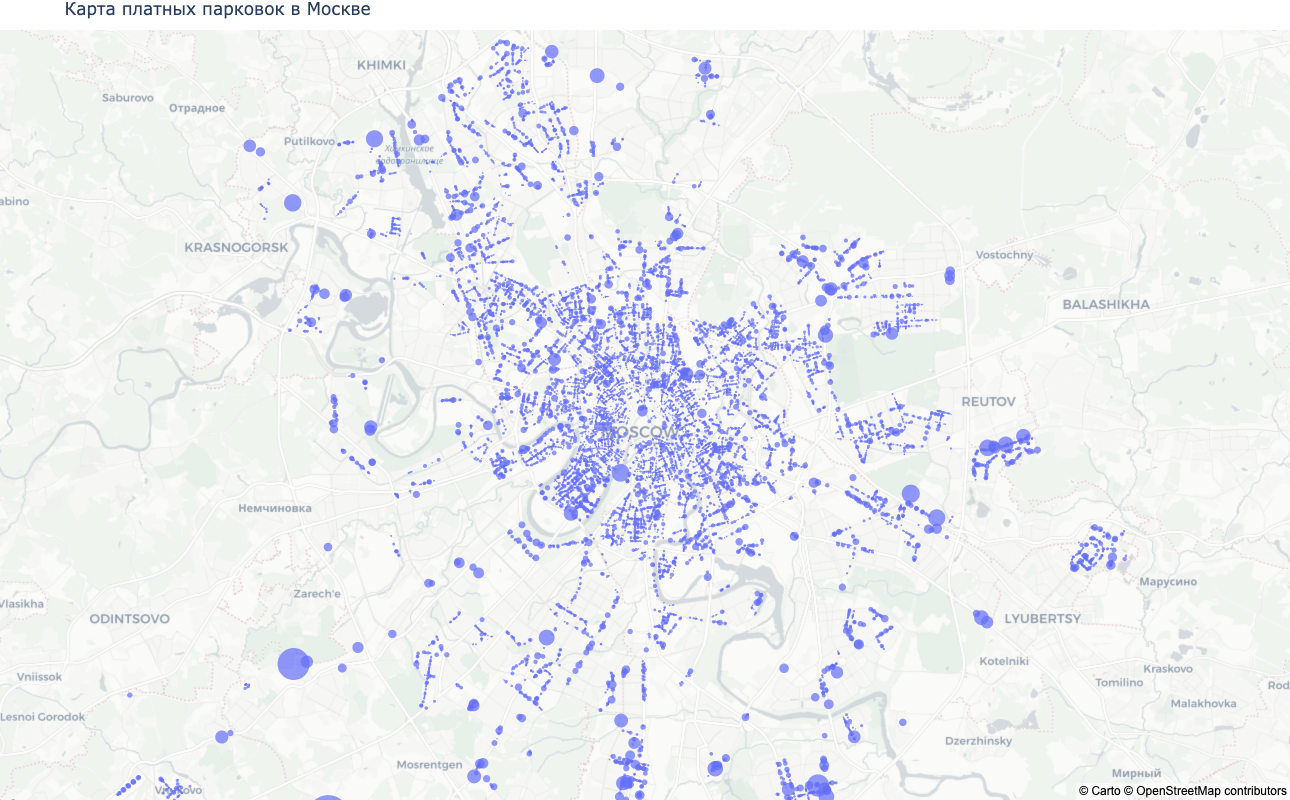

In [238]:
fig = px.scatter_mapbox(
    combined_df,
    lat="latitude",
    lon="longitude",
    hover_name="Name",
    size="CountSpaces",  
    title="Карта платных парковок в Москве",
    zoom=10,
    mapbox_style="carto-positron",
    size_max=30 
)

fig.update_layout(
    margin={"r": 0, "t": 30, "l": 0, "b": 0},
    height=800,
    width=1000
)

fig.show()